In [1]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)


[6]


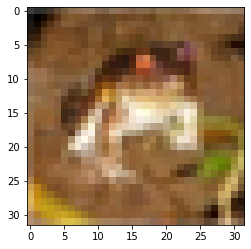

In [3]:
import matplotlib.pyplot as plt

print(Y_train[0])
plt.imshow(X_train[0])

[8]


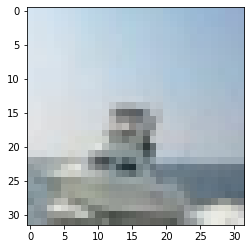

In [4]:
print(Y_train[100])
plt.imshow(X_train[100])

[9]


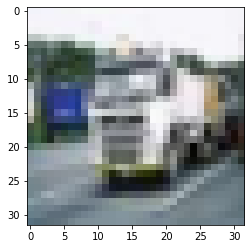

In [5]:
print(Y_train[1000])
plt.imshow(X_train[1000])

In [6]:
from tensorflow.keras.utils import to_categorical

Y_train_req = to_categorical(Y_train)
Y_test_req = to_categorical(Y_test)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augmentor = ImageDataGenerator(rotation_range=10, height_shift_range=0.1, width_shift_range=0.1, zoom_range=0.1, horizontal_flip=True, validation_split=0.1)

train_batches = augmentor.flow(X_train, Y_train_req, shuffle=True, subset='training')
val_batches = augmentor.flow(X_train, Y_train_req, subset='validation')

In [8]:
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, BatchNormalization, Dropout, Dense, Input
from tensorflow.keras.models import Sequential

In [9]:
model = Sequential()
model.add(Input((32, 32, 3)))

model.add(Conv2D(32, (3,3), padding='same', strides=1, kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(32, (3,3), padding='same', strides=1, kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D((2,2), strides=2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding='same', strides=1, kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(64, (3,3), padding='same', strides=1, kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D((2,2), strides=2))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same', strides=1, kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(128, (3,3), padding='same', strides=1, kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D((2,2), strides=2))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [11]:
from tensorflow.keras.optimizers import SGD

opt = SGD(lr=0.001, momentum=0.9)

In [12]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [13]:
steps = 45000/64

history = model.fit_generator(train_batches, validation_data=val_batches, epochs=400, steps_per_epoch=steps)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/400
704/703 [==============================] - 15s 21ms/step - loss: 2.1899 - accuracy: 0.1979 - val_loss: 1.8118 - val_accuracy: 0.3166
Epoch 2/400
704/703 [==============================] - 14s 20ms/step - loss: 1.9109 - accuracy: 0.2751 - val_loss: 1.6748 - val_accuracy: 0.3376
Epoch 3/400
704/703 [==============================] - 15s 21ms/step - loss: 1.8025 - accuracy: 0.3126 - val_loss: 1.5675 - val_accuracy: 0.4164
Epoch 4/400
704/703 [==============================] - 15s 21ms/step - loss: 1.7301 - accuracy: 0.3468 - val_loss: 1.5237 - val_accuracy: 0.4226
Epoch 5/400
704/703 [==============================] - 14s 20ms/step - loss: 1.6694 - accuracy: 0.3731 - val_loss: 1.4364 - val_accuracy: 0.4708
Epoch 6/400
704/703 [==============================] - 15s 21ms/step - loss: 1.6240 - accuracy: 0.3970 - val_loss: 1.7349 - val_accuracy: 0.4026
Epoch 7/400
704/703 [==============================] -

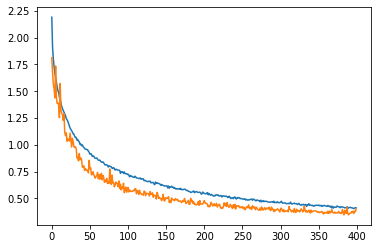

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

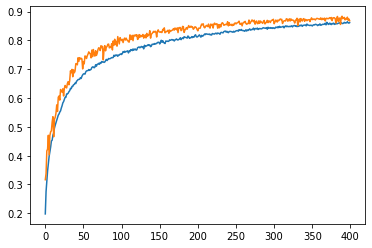

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [16]:
model.evaluate(X_test, Y_test_req)

313/313 [==============================] - 1s 4ms/step - loss: 0.4936 - accuracy: 0.8444


[0.4935951232910156, 0.8443999886512756]